# code review
- PEP8 compliance - spaces around operators FIXED
- dont use list use arrays when size is predetermined FIXED
- moved lines that do not depend on ff out of the ffs loop FIXED
- your fist savefig statement returned an error cause fig is not defined FIXED
- put counter so user knows how long its gonna be FIXED
- plot the firse derived product first, leff first then r which depends on leff FIXED

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.6666666666666666


/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


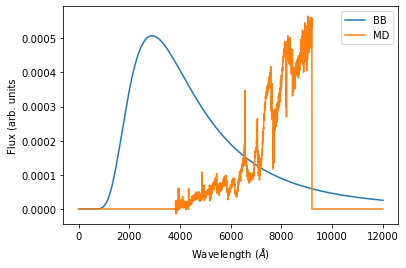

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from utils import *
from config import *
from importlib import reload
import matplotlib.pyplot as plt
from mdwarf_interp import mdwarf_interp

TEMP = 10000
airmass = airmass
WAVELENGTH = BBWAVE

bb10k = make_bb(WAVELENGTH, 10000)

mdinterp = mdwarf_interp('m5.active.ha.na.k.fits', plotit=False)
md = mdinterp(WAVELENGTH)
md_norm = sed_integ(WAVELENGTH, md)
bb_norm = sed_integ(WAVELENGTH[WMIN:WMAX], bb10k[WMIN:WMAX])

md = md / md_norm
bb = make_bb(WAVELENGTH, TEMP) / bb_norm
md_bb = md + bb

def bb_fraction(md, T, ff=0.05):
    bb = make_bb(WAVELENGTH, T) / bb_norm
    ff = ff / 0.05
    md_bb = md + bb * ff
    return sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]*ff) / sed_integ(WAVELENGTH[WMIN:WMAX],md_bb[WMIN:WMAX])

print(bb_fraction(md,TEMP, ff=0.1))

plt.plot(WAVELENGTH, bb, label='BB')
plt.plot(WAVELENGTH, md, label='MD')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Flux (arb. units')
plt.legend()

In [9]:
#what is the fract of total MD flux + BB ff 5% if BB T = 5000, what is total flux contributed by BB?

print(sed_integ(WAVELENGTH, md), sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]),sed_integ(WAVELENGTH, md_bb))

0.9999999999999998 1.0 3.112496454521011


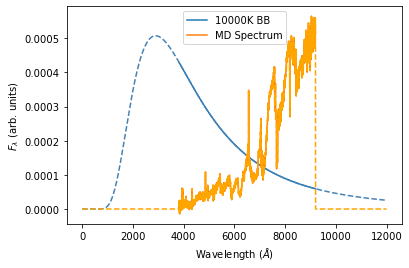

In [14]:
w = WAVELENGTH[WMIN:WMAX]
bbsub = bb[WMIN:WMAX]
mdsub = md[WMIN:WMAX]

plt.plot(w, bbsub, label='10000K BB')
plt.plot(WAVELENGTH, bb, linestyle='--', c='SteelBlue')
plt.plot(w, mdsub, label='MD Spectrum')
plt.plot(WAVELENGTH, md, linestyle='--', c='Orange')
plt.xlabel(r'Wavelength $(\AA)$')
plt.ylabel(r'$F_\lambda$ (arb. units)')
plt.legend()

plt.savefig('Figures/bb_calib.png', dpi=300, bbox_inches='tight')

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


in R DCR should be 57.1 arcsec:  55.870383732802885


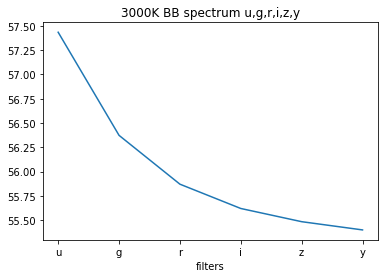

In [9]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

#weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) for t in range(100,100000,1000)])
weff = np.array([lamb_eff_BB(band=f, temp=3000, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = airmass))
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("3000K BB spectrum u,g,r,i,z,y")
print("in R DCR should be 57.1 arcsec: ", dcr_offset(weff[2], airmass = airmass))

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


DCR in r should be 


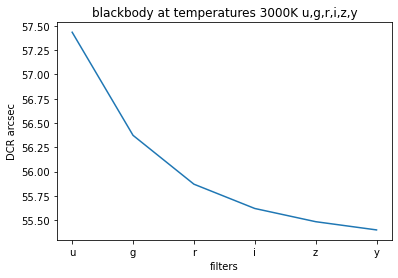

In [10]:
weff = np.array([lamb_eff_BB(band=f, temp=3000, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("blackbody at temperatures 3000K u,g,r,i,z,y");
print("DCR in r should be ")

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


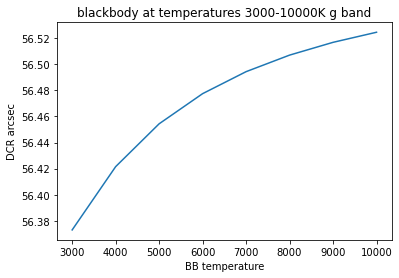

In [11]:
weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) 
                 for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000), dcr_offset(weff, airmass = airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K g band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


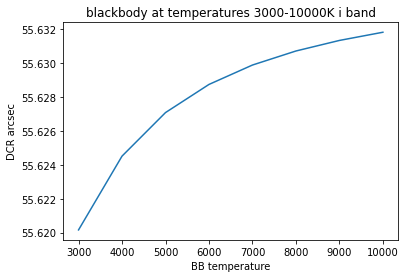

In [12]:
weff = np.array([lamb_eff_BB(band="i", temp=t, verbose=False) 
                 for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000),dcr_offset(weff, airmass = airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K i band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


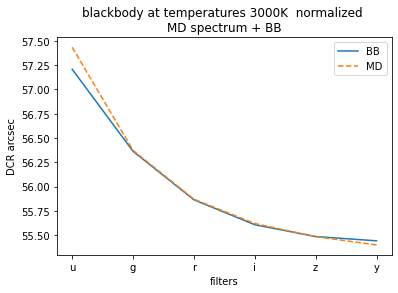

In [13]:
w_eff1 = np.array([lamb_eff_md(band=f, temp=3000, mdname='m5.active.ha.na.k.fits', ff=0.05)  
                  for f in filters])
w_eff2 = np.array([lamb_eff_BB(band=f, temp=3000,)  
                  for f in filters])
plt.plot(dcr_offset(w_eff1, airmass = airmass), label="BB")
plt.plot(dcr_offset(w_eff2, airmass = airmass), '--', label="MD")
plt.ylabel("DCR arcsec")
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("blackbody at temperatures 3000K  normalized \nMD spectrum + BB")
plt.legend();

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


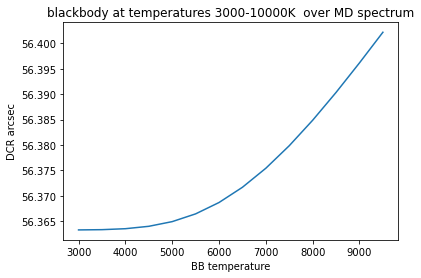

In [15]:
w_eff = np.array([lamb_eff_md(band='g', temp=t, mdname='m5.active.ha.na.k.fits', ff=0.05)  
                   for t in range(3000,10000,500)])
plt.plot(range(3000,10000,500), dcr_offset(w_eff, airmass = airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K  over MD spectrum");

In [9]:
grid = np.zeros((10,10))

ams = np.arange(1,2,0.1)
temps = np.arange(1000,11000,1000)

for i, am in enumerate(ams):
    for j, t in enumerate(temps):
        w_eff = lamb_eff_md(band='g', temp=t, mdname='m5.active.ha.na.k.fits', ff=0.05)  
        grid[i][j] = dcr_offset(w_eff, airmass=am)

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


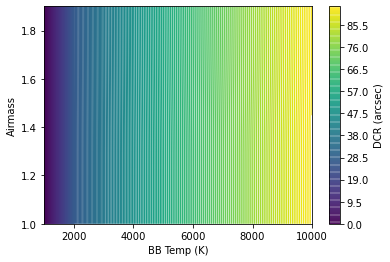

In [10]:
fig, ax = plt.subplots(1,1)

c = ax.contour(temps, ams, grid.T, 200, cmap='viridis')
ax.set_ylabel('Airmass')
ax.set_xlabel('BB Temp (K)')
cbar = fig.colorbar(c)
cbar.set_label('DCR (arcsec)', rotation=90)

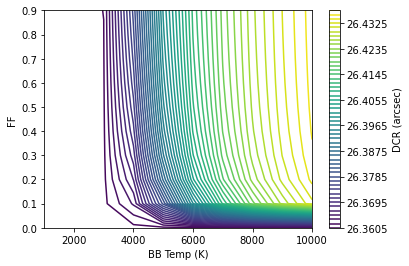

In [6]:
grid = np.zeros((10,10))

ffs = np.arange(0,1,0.1)
temps = np.arange(1000,11000,1000)

for i, ff in enumerate(ffs):
    for j, t in enumerate(temps):
        w_eff = lamb_eff_md(band='g', temp=t, mdname='m5.active.ha.na.k.fits', ff=ff)  
        grid[i][j] = dcr_offset(w_eff, airmass=1.1)

fig, ax = plt.subplots(1,1)

c = ax.contour(temps, ffs, grid, 50, cmap='viridis')
ax.set_ylabel('FF')
ax.set_xlabel('BB Temp (K)')
cbar = fig.colorbar(c)
cbar.set_label('DCR (arcsec)', rotation=90)